In [1]:
import pandas as pd
df = pd.read_csv('dot1_1022.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [2]:
df.sample()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,MEXSTATE,CANPROV,COUNTRY,VALUE,SHIPWT,FREIGHT_CHARGES,DF,CONTCODE,MONTH,YEAR
17344,1,WI,2506,5,DF,NaN,2010,2633,0,0,1.00,0,10,2022


In [44]:
df.columns

Index(['TRDTYPE', 'USASTATE', 'DEPE', 'DISAGMOT', 'MEXSTATE', 'CANPROV',
       'COUNTRY', 'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF', 'CONTCODE',
       'MONTH', 'YEAR'],
      dtype='object')

In [3]:
df = df[['TRDTYPE', 'USASTATE', 'DEPE', 'DISAGMOT', 
#          'MEXSTATE', 'CANPROV', 'COUNTRY', 
         'VALUE', 'SHIPWT', 'FREIGHT_CHARGES', 'DF', 
#          'CONTCODE', 'MONTH', 'YEAR'
        ]]

In [4]:
df['TRDTYPE'] = df['TRDTYPE'].map({
    1 : 'Export',
    2 : 'Import'
})

In [5]:
df['DF'] = df['DF'].map({
    1 : 'Domestic',
    2 : 'Foreign'
})

In [6]:
df['DISAGMOT'] = df['DISAGMOT'].map({
    1 : 'Vessel',
    3 : 'Air',
    4 : 'USPS',
    5 : 'Truck',
    6 : 'Rail',
    7 : 'Pipeline',
    8 : 'Other',
    9 : 'FTZs'
})

In [8]:
df.head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,VALUE,SHIPWT,FREIGHT_CHARGES,DF
0,Export,AK,0712,Truck,2875,0,21,Domestic
1,Export,AK,09XX,Air,2568,4,65,Domestic
2,Export,AK,20XX,Air,94896,905,5211,Domestic
3,Export,AK,20XX,Air,35776,256,491,Foreign
4,Export,AK,20XX,Air,169358,536,11560,Domestic


**Top 10 US States For Import/Export**

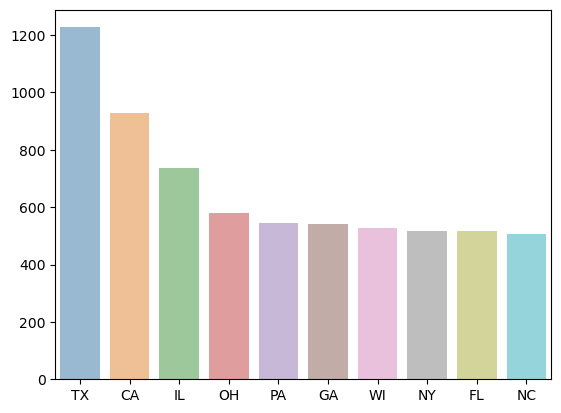

In [49]:
plt.figure.figsize=(10,5)
plt.title='Top 10 US States for Export'
plt.xlabel='US State'
ex_state = df[df.TRDTYPE == 'Export'].USASTATE.value_counts()
ex_state = ex_state[:10,]
sns.barplot(x=ex_state.index, y=ex_state.values, data=df, alpha=0.5)
plt.ylabel='Count'

plt.show()


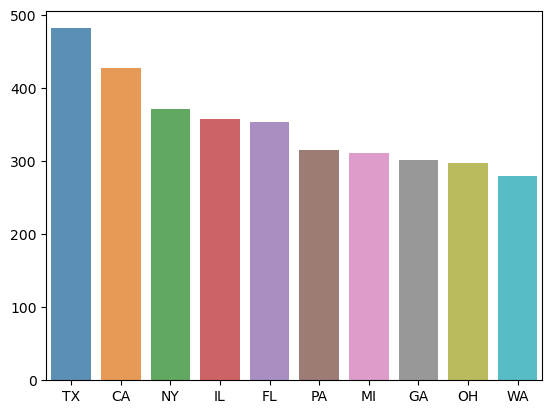

In [51]:
im_state = df[df.TRDTYPE == 'Import'].USASTATE.value_counts()
im_state = im_state[:10,]
sns.barplot(x=im_state.index, y=im_state.values, data=df, alpha=0.8)
plt.show

plt.title='Top 10 US States for Imports'
plt.ylabel='Count'
plt.xlabel='US States'

**Top 10 US States for Shipping Value**

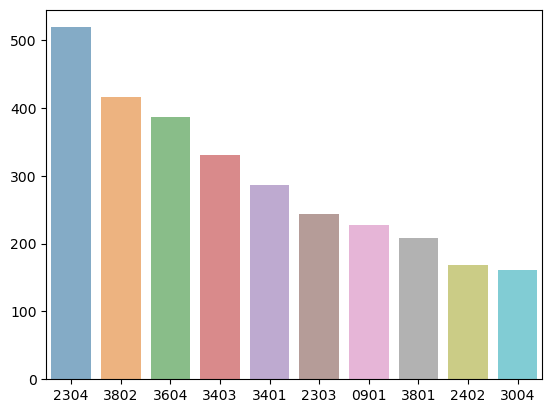

In [58]:
port_rail = df[df.DISAGMOT == 'Rail'].DEPE.value_counts()
port_rail = port_rail[:10,]
sns.barplot(x=port_rail.index, y=port_rail.values, data=df, alpha=0.6)
plt.show()

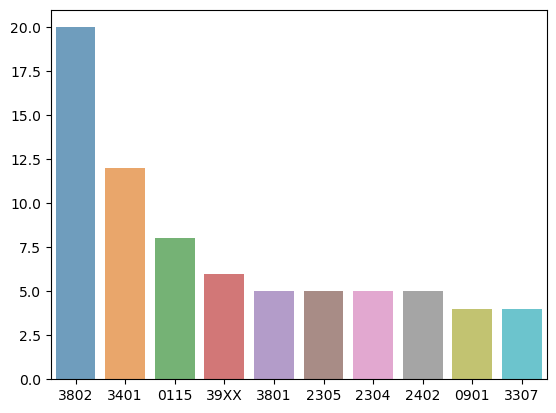

In [8]:
port_pipe = df[df.DISAGMOT == 'Pipeline'].DEPE.value_counts()
port_pipe = port_pipe[:10,]
sns.barplot(x=port_pipe.index, y=port_pipe.values, data=df, alpha=0.7)
plt.show()

In [60]:
df.isna().sum()

TRDTYPE                0
USASTATE               0
DEPE                   0
DISAGMOT               0
VALUE                  0
SHIPWT                 0
FREIGHT_CHARGES        0
DF                 10632
dtype: int64

DISAGMOT  USASTATE
Air       CA         0.05
          TX         0.05
          IL         0.04
          FL         0.04
          NY         0.03
          GA         0.03
          PA         0.03
          NC         0.03
          NJ         0.03
          OH         0.03
Name: USASTATE, dtype: float64


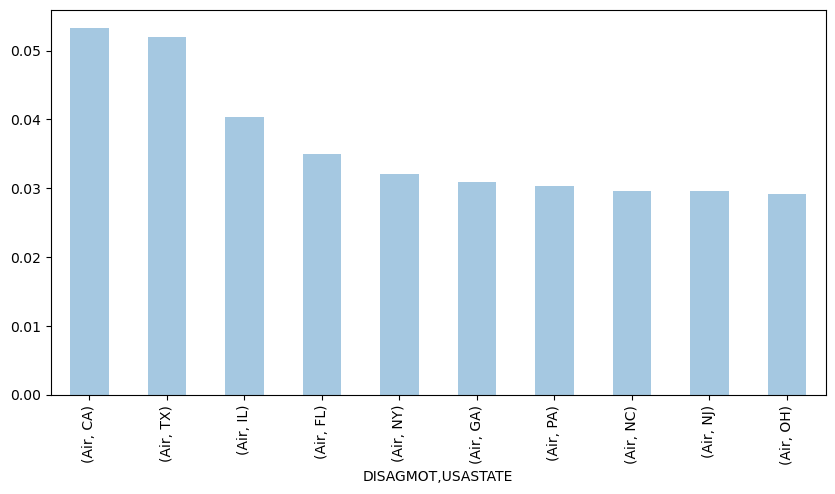

In [7]:
mot_state = df.groupby('DISAGMOT').USASTATE.value_counts(normalize=True)
mot_state = mot_state[:10,]
print(mot_state)
# sns.barplot(x=mot_state.index, y=mot_state.values, data=df, alpha=0.4)
mot_state.plot(kind='bar', figsize=(10,5), alpha=0.4)
plt.show()


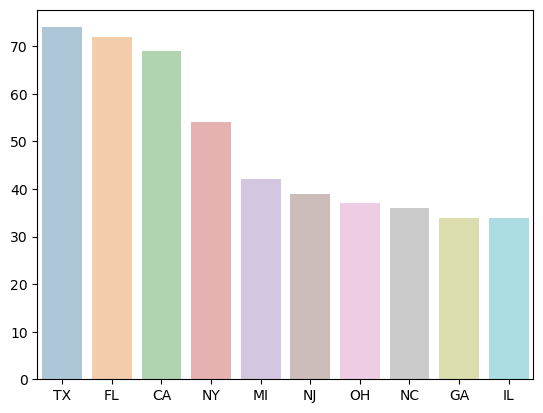

In [73]:
vessel = df[df.DISAGMOT == 'Vessel'].USASTATE.value_counts()
vessel = vessel[:10,]
sns.barplot(x=vessel.index, y=vessel.values, data=df, alpha=0.4)
plt.show()

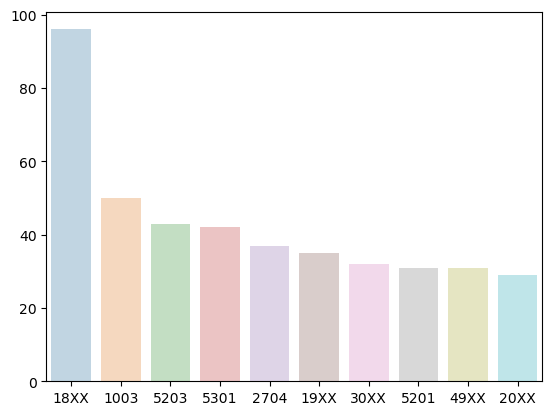

In [74]:
vessel_port = df[df.DISAGMOT == 'Vessel'].DEPE.value_counts()
vessel_port = vessel_port[:10,]
sns.barplot(x=vessel_port.index, y=vessel_port.values, data=df, alpha=0.3)
plt.show()

In [84]:
df.columns

Index(['TRDTYPE', 'USASTATE', 'DEPE', 'DISAGMOT', 'VALUE', 'SHIPWT',
       'FREIGHT_CHARGES', 'DF'],
      dtype='object')

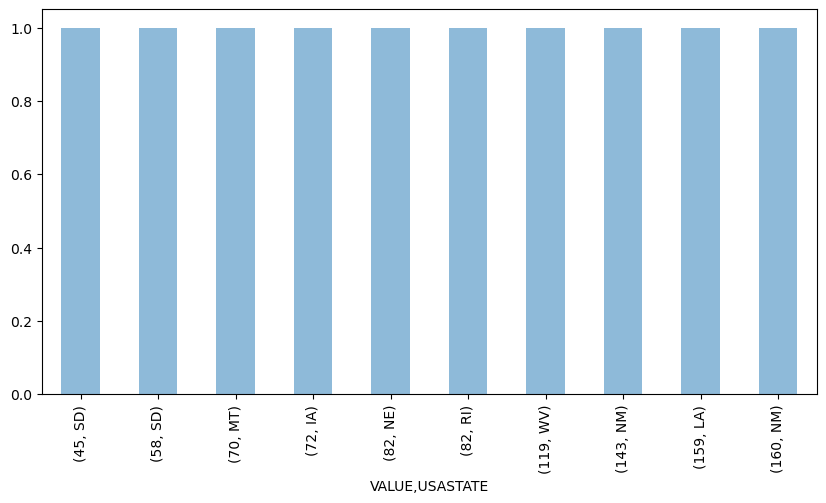

In [88]:
port_val = df.groupby('VALUE').USASTATE.value_counts()
port_val = port_val[:10,]
port_val.plot(kind='bar', figsize=(10,5), alpha=0.5)
plt.show()

In [10]:
df.sort_values('DISAGMOT').head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,VALUE,SHIPWT,FREIGHT_CHARGES,DF
28485,Import,WY,41XX,Air,25756,237,200,NaN
4309,Export,ID,20XX,Air,236470,391,5176,Foreign
4308,Export,ID,20XX,Air,471641,1171,6587,Domestic
4307,Export,ID,20XX,Air,333964,5596,4233,Foreign
4306,Export,ID,20XX,Air,794497,1370,7280,Domestic


In [11]:
df.sort_values('DISAGMOT', ascending=False).head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,VALUE,SHIPWT,FREIGHT_CHARGES,DF
27918,Import,WA,30XX,Vessel,361014,27516300,10000,NaN
16928,Export,WA,30XX,Vessel,42638,214,520,Domestic
16927,Export,WA,30XX,Vessel,1574884,30018,11849,Foreign
19995,Import,GA,15XX,Vessel,2915,110,58,NaN
19994,Import,GA,14XX,Vessel,7910,25144,2500,NaN


In [16]:
df.sort_values(['VALUE', 'SHIPWT'], ascending=False).head()

,TRDTYPE,USASTATE,DEPE,DISAGMOT,VALUE,SHIPWT,FREIGHT_CHARGES,DF
20925,Import,IL,39XX,Pipeline,3898220115,7363930326,175188532,NaN
26869,Import,TX,2304,Truck,3793741947,978274186,34717335,NaN
26898,Import,TX,2401,Truck,2738327291,114477373,5799706,NaN
2836,Export,DU,70XX,Other,2148106871,0,0,Domestic
18640,Import,CA,2506,Truck,2022119509,294237080,7146800,NaN


In [17]:
df.dtypes

TRDTYPE            object
USASTATE           object
DEPE               object
DISAGMOT           object
VALUE               int64
SHIPWT              int64
FREIGHT_CHARGES     int64
DF                 object
dtype: object